In [88]:
#importing libraries for coding
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx
import folium
from shapely.geometry import Point
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [93]:
# importing schools file
schools = gpd.read_file('data/public_hs.csv')
schools

,Campus Name,CCSF Entity,Grade Range,Location 1
0,"Marshall, Thurgood Marshall High School",SFUSD,9-12,"(37.736309, -122.401649)"
1,"Hearst, Phoebe Apperson Hearst Home",SFUSD,9-12,"(37.74363, -122.500053)"
2,"Burton, Phillip And Sala Burton High School",SFUSD,9-12,"(37.721546, -122.406555)"
3,"Washington, George Washington High School",SFUSD,9-12,"(37.777905, -122.491013)"
4,"Lincoln, Abraham Lincoln High School",SFUSD,9-12,"(37.746594, -122.48024)"
5,Life Learning Academy Charter School,SFUSD,9-12,"(37.825512, -122.367996)"
6,Gateway High School / Kipp Sf Bay Academy,SFUSD,9-12,"(37.783264, -122.436691)"
7,Galileo High School,SFUSD,9-12,"(37.803791, -122.424149)"
8,Balboa High School,SFUSD,9-12,"(37.721142, -122.441399)"
9,City Arts And Tech High School,SFUSD,9-12,"(37.718784, -122.424667)"


In [102]:
schools['latitude'] = schools['Location 1'].apply(lambda x: float(x.strip('()').split(',')[0]))
schools['longitude'] = schools['Location 1'].apply(lambda x: float(x.strip('()').split(',')[1]))

# Step 3: Create Point objects from the extracted latitude and longitude values
schools['geometry'] = schools.apply(lambda row: Point(row['latitude'], row['longitude']), axis=1)

# Step 4: Assign the Point objects to a new geometry column in the GeoDataFrame
schools = gpd.GeoDataFrame(schools, geometry='geometry')
schools

,Campus Name,CCSF Entity,Grade Range,Location 1,latitude,longitude,geometry
0,"Marshall, Thurgood Marshall High School",SFUSD,9-12,"(37.736309, -122.401649)",37.736309,-122.401649,POINT (37.736 -122.402)
1,"Hearst, Phoebe Apperson Hearst Home",SFUSD,9-12,"(37.74363, -122.500053)",37.743630,-122.500053,POINT (37.744 -122.5)
2,"Burton, Phillip And Sala Burton High School",SFUSD,9-12,"(37.721546, -122.406555)",37.721546,-122.406555,POINT (37.722 -122.407)
3,"Washington, George Washington High School",SFUSD,9-12,"(37.777905, -122.491013)",37.777905,-122.491013,POINT (37.778 -122.491)
4,"Lincoln, Abraham Lincoln High School",SFUSD,9-12,"(37.746594, -122.48024)",37.746594,-122.480240,POINT (37.747 -122.48)
5,Life Learning Academy Charter School,SFUSD,9-12,"(37.825512, -122.367996)",37.825512,-122.367996,POINT (37.826 -122.368)
6,Gateway High School / Kipp Sf Bay Academy,SFUSD,9-12,"(37.783264, -122.436691)",37.783264,-122.436691,POINT (37.783 -122.437)
7,Galileo High School,SFUSD,9-12,"(37.803791, -122.424149)",37.803791,-122.424149,POINT (37.804 -122.424)
8,Balboa High School,SFUSD,9-12,"(37.721142, -122.441399)",37.721142,-122.441399,POINT (37.721 -122.441)
9,City Arts And Tech High School,SFUSD,9-12,"(37.718784, -122.424667)",37.718784,-122.424667,POINT (37.719 -122.425)


In [115]:
import re
schools = gpd.GeoDataFrame(schools, geometry='geometry', crs='EPSG:4326')

def schools_walking_map(school, place):
    latlon = school.geometry.coords[0][::-1]  # Reverse the order to get (latitude, longitude)
    network_type = 'walk' 
    trip_times = [5, 10, 15] 
    meters_per_minute = 75 

    G = ox.graph_from_point(latlon, network_type=network_type, dist=2000)
    G = ox.project_graph(G, to_crs='epsg:3857')
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

    minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
    centroid_x = (maxx - minx) / 2 + minx
    centroid_y = (maxy - miny) / 2 + miny

    center_node = ox.distance.nearest_nodes(G, Y=centroid_y, X=centroid_x)

    gdf_edges['walk_time'] = gdf_edges['length'] / meters_per_minute

    cmap = 'RdYlGn'
    iso_colors = ox.plot.get_colors(n=len(trip_times), cmap=cmap, start=0)

    time_color = list(zip(trip_times, iso_colors))
    time_color.reverse()

    for time, color in list(time_color):
        # for each trip time, create an egograph of nodes that fall within that distance
        subgraph = nx.ego_graph(G, center_node, radius=time, distance='walk_time')

        # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
        for node in subgraph.nodes():
            gdf_nodes.loc[node, 'time'] = time
            gdf_nodes.loc[node, 'color'] = color

    gdf_nodes['color'].fillna('#cccccc', inplace=True)

    isochrones = gdf_nodes.dissolve(by="time")
    isochrones = isochrones.convex_hull.reset_index(name='geometry')
    isochrones.sort_values(by='time', ascending=False, inplace=True)
    iso_colors = ['#f7fcb9', '#addd8e', '#31a354']

    fig, ax = plt.subplots(figsize=(10, 15))

    # add the isochrone boundary
    isochrones.boundary.plot(
        ax=ax,
        alpha=1,
        linestyle='--',
        color=iso_colors,
        lw=2
    )

    # add the isochrones
    isochrones.plot(
        ax=ax,
        alpha=0.2,
        categorical=True,  # even though it is numeric, treat it as categorical
        color=iso_colors,
    )

    # add the center node in red
    gdf_nodes.loc[[center_node]].plot(
        ax=ax,
        color='r',
        marker='x',
        markersize=50
    )

    # build custom legend
    legend_elements = [
        # add the center node to the legend
        Line2D([0], [0], marker='x', color='red', linestyle='', label='Start location', markersize=6),
    ]

    # sort back to small time to large time
    # time_color.sort(reverse=False)
    time_color.reverse()

    # loop through the list of time/colors and add each to the legend
    for time, color in list(time_color):
        legend_item = Patch(facecolor=color, edgecolor=color, linestyle='--', linewidth=1, label=str(time) + ' minutes', alpha=0.4)
        legend_elements.append(legend_item)

    # add the legend
    ax.legend(handles=legend_elements, loc='lower left')  # location options: upper/center/lower and left/center/right

    # add a title
    ax.set_title(f'How far can you walk from {place}?', fontsize=25, pad=20)

    # hide the axis
    ax.axis('off')

    # add the basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

    # Sanitize the place string to create a valid filename
    sanitized_place = re.sub(r'[^a-zA-Z0-9]', '_', place)

    # Save the figure
    plt.savefig(f'{sanitized_place}_walking_map.png')
    plt.close()

# Iterate over each unique location and create a map
for idx, school in schools.iterrows():
    place = school['Campus Name']  # Replace with the actual column name for the school name
    schools_walking_map(school, place)

/tmp/ipykernel_153/1621224264.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf_nodes['color'].fillna('#cccccc', inplace=True)
/tmp/ipykernel_153/1621224264.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [109]:
hsname_list = schools['Campus Name'].tolist()
hsname_list

['Marshall, Thurgood Marshall High School',
 'Hearst, Phoebe Apperson Hearst Home',
 'Burton, Phillip And Sala Burton High School',
 'Washington, George Washington High School',
 'Lincoln, Abraham Lincoln High School',
 'Life Learning Academy Charter School',
 'Gateway High School / Kipp Sf Bay Academy',
 'Galileo High School',
 'Balboa High School',
 'City Arts And Tech High School',
 'Independence High School',
 'Wallenberg, Raoul Wallenberg High School',
 'Downtown High School',
 'San Francisco International High School',
 'Jordan, June Jordan High School',
 "O'Connell, John O'Connell High School",
 'Mission High School',
 'Wells, Ida B. Wells High School']

/tmp/ipykernel_153/3581064961.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf_nodes['color'].fillna('#cccccc', inplace=True)


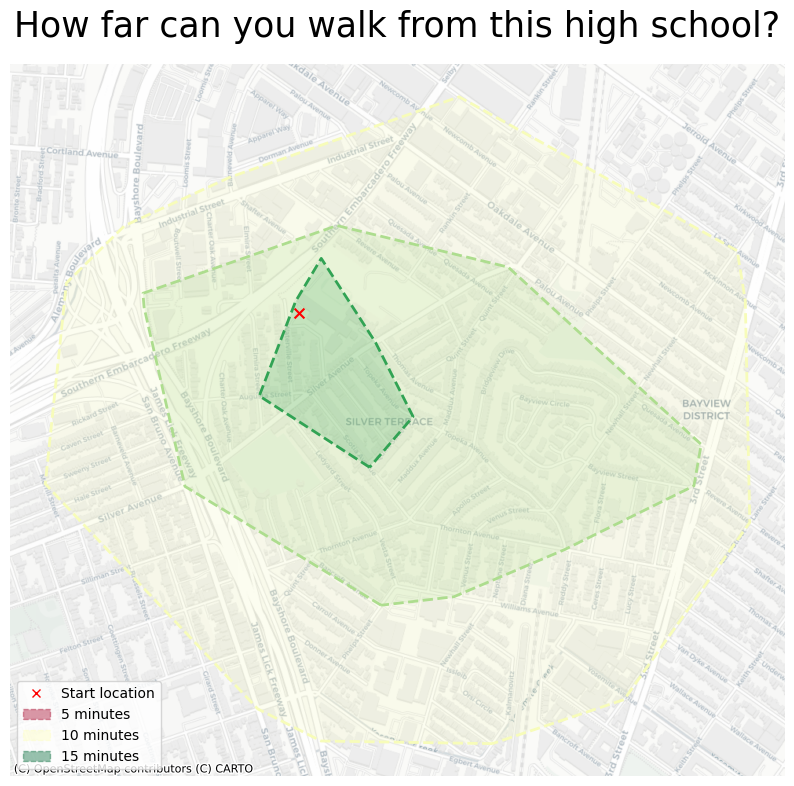

In [101]:
latlon = [37.73631, -122.40165]
network_type = 'walk' 
trip_times = [5, 10, 15] 
meters_per_minute = 75 

G = ox.graph_from_point(latlon, network_type=network_type, dist = 2000)
G = ox.project_graph(G, to_crs='epsg:3857')
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny

center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)

gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

cmap = 'RdYlGn'
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap=cmap, 
                                start=0)

time_color = list(zip(trip_times, iso_colors))
time_color.reverse()

for time, color in list(time_color):

# for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time,distance='time')
    
# for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = time
        gdf_nodes.loc[node,'color'] = color

gdf_nodes['color'].fillna('#cccccc', inplace=True)

isochrones = gdf_nodes.dissolve(by = "time")
isochrones = isochrones.convex_hull.reset_index(name='geometry')
isochrones.sort_values(by='time', ascending=False,inplace=True)
iso_colors = ['#f7fcb9', '#addd8e', '#31a354']

fig, ax = plt.subplots(figsize=(10,15))

# add the isochrone boundary
isochrones.boundary.plot(
    ax=ax,
    alpha=1,
    linestyle='--',
    color=iso_colors,
    lw=2
    ) 

# add the isochrones
isochrones.plot(
    ax=ax, 
    alpha=0.2, 
    categorical=True, # even though it is numeric, treat it as categorical
    color=iso_colors,
    )

# add the center node in red
gdf_nodes.loc[[center_node]].plot(
    ax=ax,
    color='r',
    marker='x',
    markersize=50
    )

# build custom legend
legend_elements = [
    # add the center node to the legend
    Line2D([0], [0], marker='x', color='red', linestyle='',label='Start location', markersize=6),
    ]

# sort back to small time to large time
# time_color.sort(reverse=False)
time_color.reverse()

# loop through the list of time/colors and add each to the legend
for time,color in list(time_color):
    legend_item = Patch(facecolor=color, edgecolor=color, linestyle='--',linewidth=1,label=str(time)+' minutes',alpha=0.4)
    legend_elements.append(legend_item)

# add the legend
ax.legend(handles=legend_elements,loc='lower left') # location options: upper/center/lower and left/center/right

# add a title
ax.set_title('How far can you walk from this high school?',fontsize=25,pad=20)

# hide the axis
ax.axis('off')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)